In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the files
x_train = pd.read_csv("C:/Users/91735/Documents/INT354CA1/TestTrain/drugsComTrain_raw.tsv", sep="\t", parse_dates=["date"])
x_test = pd.read_csv("C:/Users/91735/Documents/INT354CA1/TestTrain/drugsComTest_raw.tsv", sep="\t", parse_dates=["date"])

In [3]:
#Viewing first 5 samples of each dataset
x_train.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [4]:
x_test.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22,4


In [5]:
#Changing the dtype of rating column from float to integer
x_train = x_train.astype({'rating': 'int64'})
x_test = x_test.astype({'rating': 'int64'})

In [6]:
#Creating a new column sentiment with the criteria:

#Negative (if rating < 7)
#Positive (if rating >= 7)


x_train['sentiment'] = x_train.rating.apply(lambda r: "negative" if r<7 else "positive")
x_test['sentiment'] = x_test.rating.apply(lambda r: "negative" if r<7 else "positive")

In [7]:
#shapes of dataset

x_train.shape

(161297, 8)

In [8]:
x_test.shape

(53766, 8)

In [9]:
#Concatenating both into one dataset

df = pd.concat([x_train, x_test], axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   215063 non-null  int64         
 1   drugName     215063 non-null  object        
 2   condition    213869 non-null  object        
 3   review       215063 non-null  object        
 4   rating       215063 non-null  int64         
 5   date         215063 non-null  datetime64[ns]
 6   usefulCount  215063 non-null  int64         
 7   sentiment    215063 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 14.8+ MB


In [11]:
df.columns = ['ID','drugName','condition','review','rating','date','usefulContent','sentiment']


In [12]:
df.head()


,ID,drugName,condition,review,rating,date,usefulContent,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,negative
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,positive


In [13]:
#checking for null values

df.isnull().sum()

ID                  0
drugName            0
condition        1194
review              0
rating              0
date                0
usefulContent       0
sentiment           0
dtype: int64

In [14]:
#group the condition by drug name and sort in descending order

df_cond = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

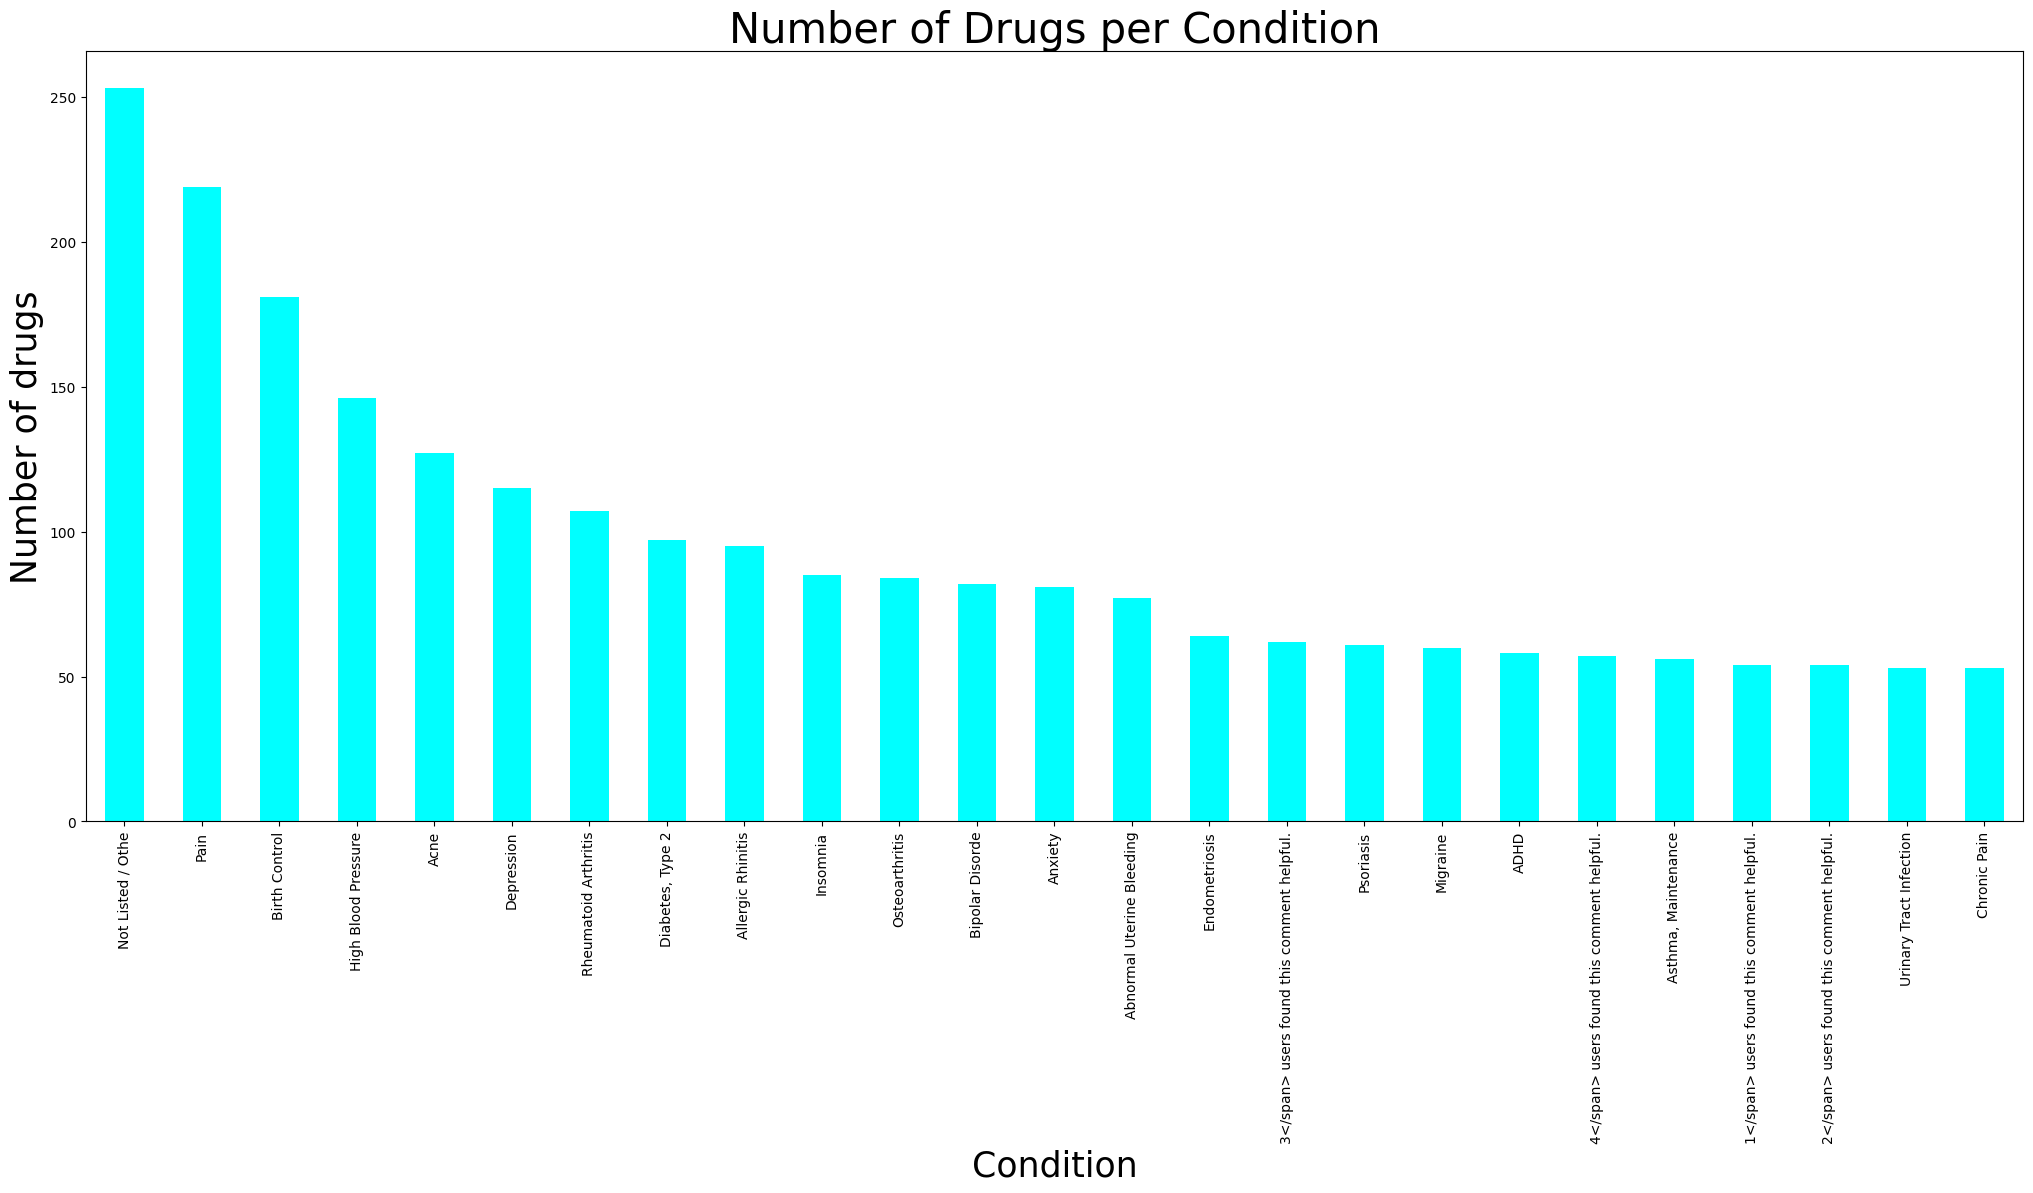

In [15]:
#barplot of top 25 number of drugs per condition

df_cond[0:25].plot(kind='bar', figsize=(25,10), fontsize=10, color='aqua')
plt.xlabel("Condition", fontsize=25)
plt.ylabel("Number of drugs", fontsize=25)
plt.title("Number of Drugs per Condition", fontsize=30)
plt.show()

In [16]:
#reviews have been recorded in each year

reviews_per_year = df['date'].dt.year.value_counts().sort_index()

In [17]:

reviews_per_year

date
2008     6785
2009    15642
2010    11227
2011    15454
2012    13382
2013    16359
2014    16104
2015    36192
2016    46607
2017    37311
Name: count, dtype: int64

In [18]:
#checking how many users have regarded a certain drug as useful

usefulDrugs = df.groupby(['drugName'])['usefulContent'].nunique().sort_values(ascending=False)

In [19]:
usefulDrugs

drugName
Sertraline          197
Citalopram          195
Fluoxetine          194
Celexa              192
Prozac              192
                   ... 
Maxidone              1
Maxidex               1
Maxichlor PSE DM      1
Maxair                1
pHisoHex              1
Name: usefulContent, Length: 3671, dtype: int64

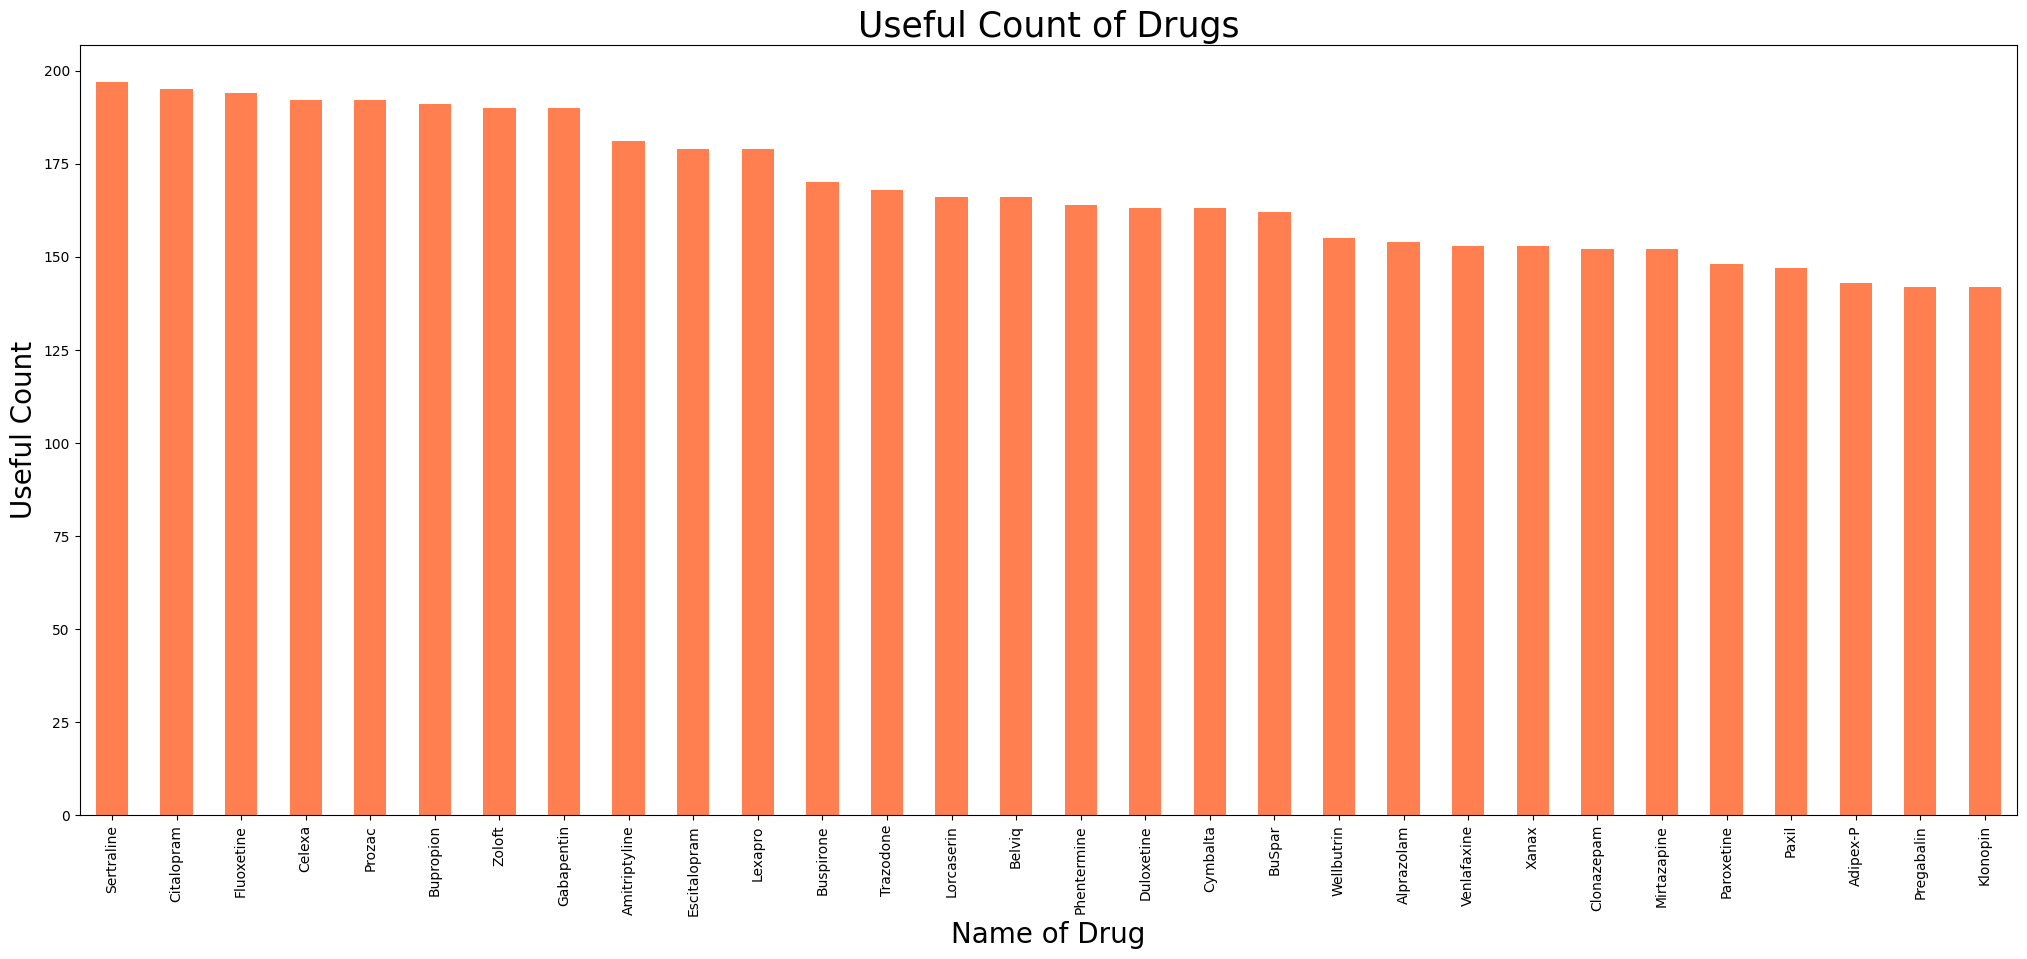

In [20]:
#barchart on usefulness of top 30 drugs

usefulDrugs[0:30].plot(kind='bar', figsize=(25,10), fontsize=10, color='coral')
plt.xlabel("Name of Drug", fontsize=20)
plt.ylabel("Useful Count", fontsize=20)
plt.title("Useful Count of Drugs", fontsize=25)
plt.show()

In [21]:
#umber of reviews of each rating.

ratings = df['rating'].value_counts().sort_values(ascending=False)

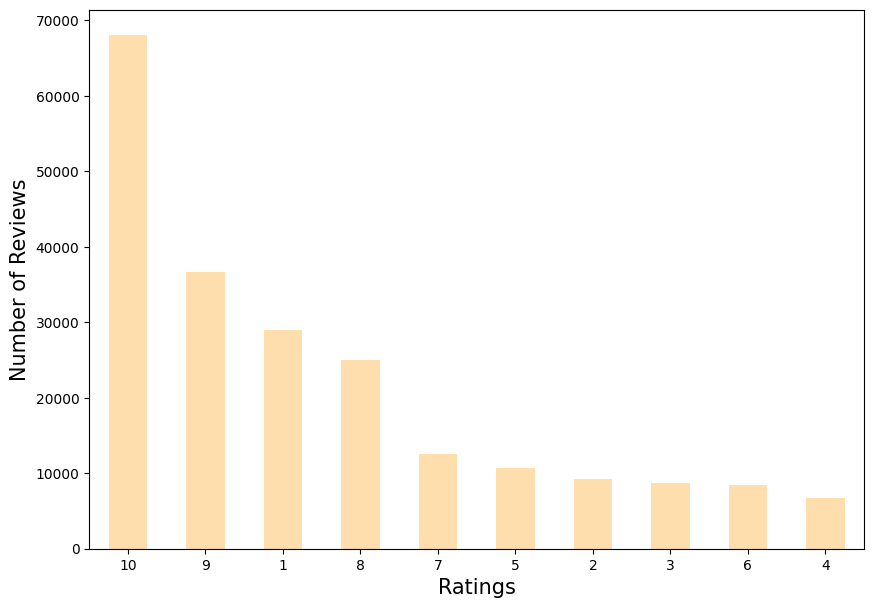

In [22]:
#barchart on the basis of ratings against  number of views

ratings.plot(kind='bar', figsize=(10,7), fontsize=10, color='navajowhite')
plt.xlabel("Ratings", fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel("Number of Reviews", fontsize=15)
plt.show()

In [23]:
#number of positive and negative reviews for each drug.

drug_senti = df.groupby(['drugName'])['sentiment'].value_counts().sort_index()

In [24]:
drug_senti

drugName                              sentiment
A + D Cracked Skin Relief             positive      1
A / B Otic                            positive      2
Abacavir / dolutegravir / lamivudine  negative     13
                                      positive     57
Abacavir / lamivudine                 positive      3
                                                   ..
ella                                  negative     23
                                      positive     48
femhrt                                negative      2
                                      positive      4
pHisoHex                              positive      1
Name: count, Length: 5885, dtype: int64

In [25]:
drug_sent = drug_senti.groupby(['drugName', 'sentiment']).sum().unstack().fillna(0)

In [26]:
drug_sent

sentiment,negative,positive
drugName,,
A + D Cracked Skin Relief,0.0,1.0
A / B Otic,0.0,2.0
Abacavir / dolutegravir / lamivudine,13.0,57.0
Abacavir / lamivudine,0.0,3.0
Abacavir / lamivudine / zidovudine,0.0,1.0
...,...,...
ZzzQuil,3.0,0.0
depo-subQ provera 104,1.0,1.0
ella,23.0,48.0


In [27]:
positive_count = drug_sent['positive'].sort_values(ascending=False)
negative_count = drug_sent['negative'].sort_values(ascending=False)

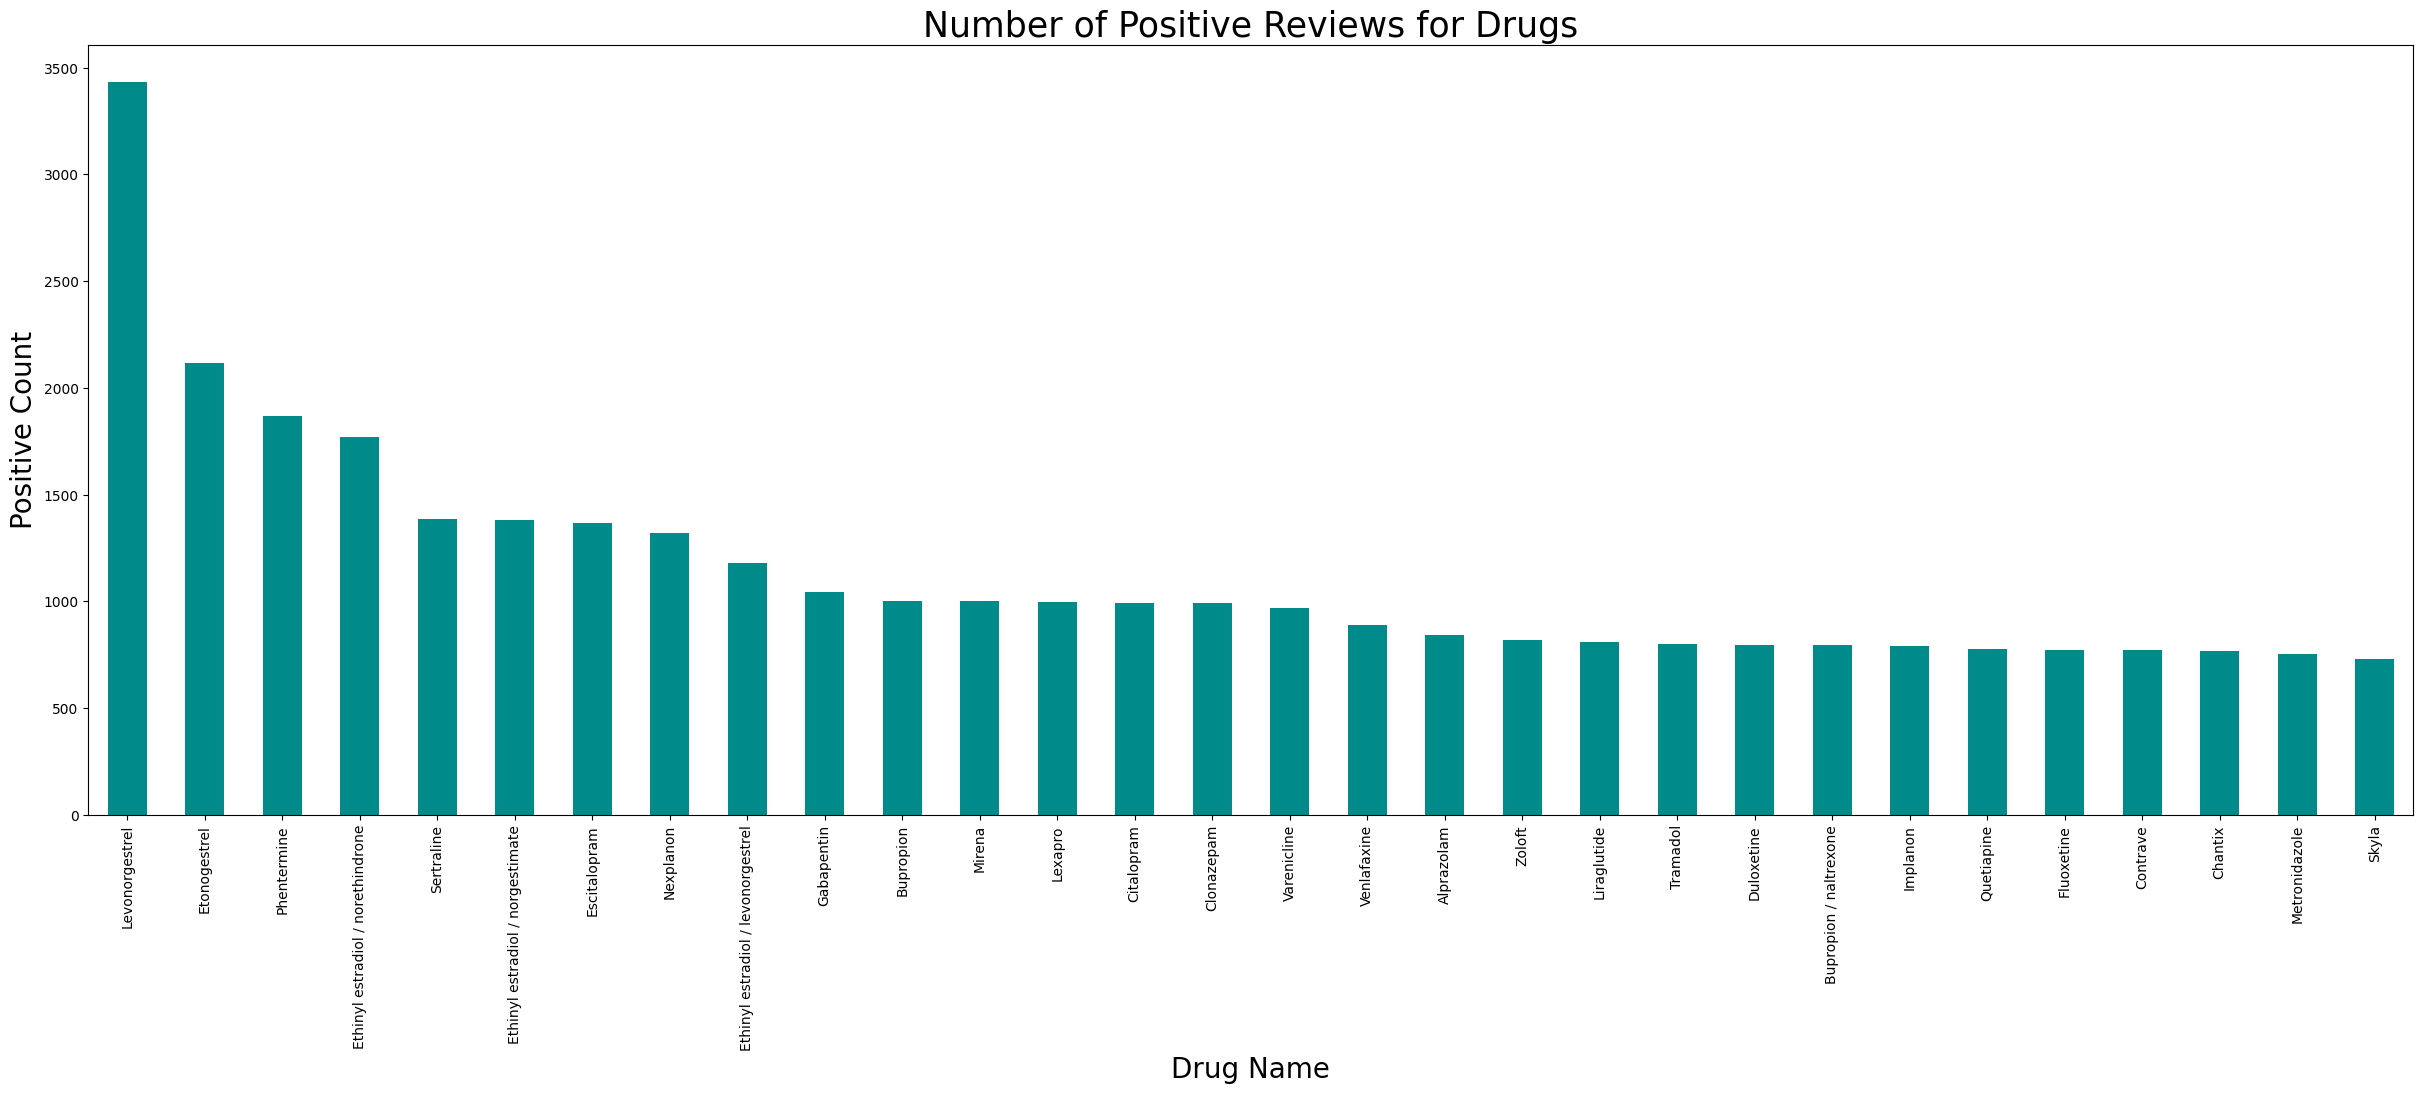

In [28]:
#Number of positive reviews for top 30 drugs

positive_count[0:30].plot(kind='bar', figsize=(30,10), fontsize=(10), color='darkcyan')
plt.xlabel("Drug Name", fontsize=20)
plt.ylabel("Positive Count", fontsize=20)
plt.title("Number of Positive Reviews for Drugs", fontsize=25)
plt.show()

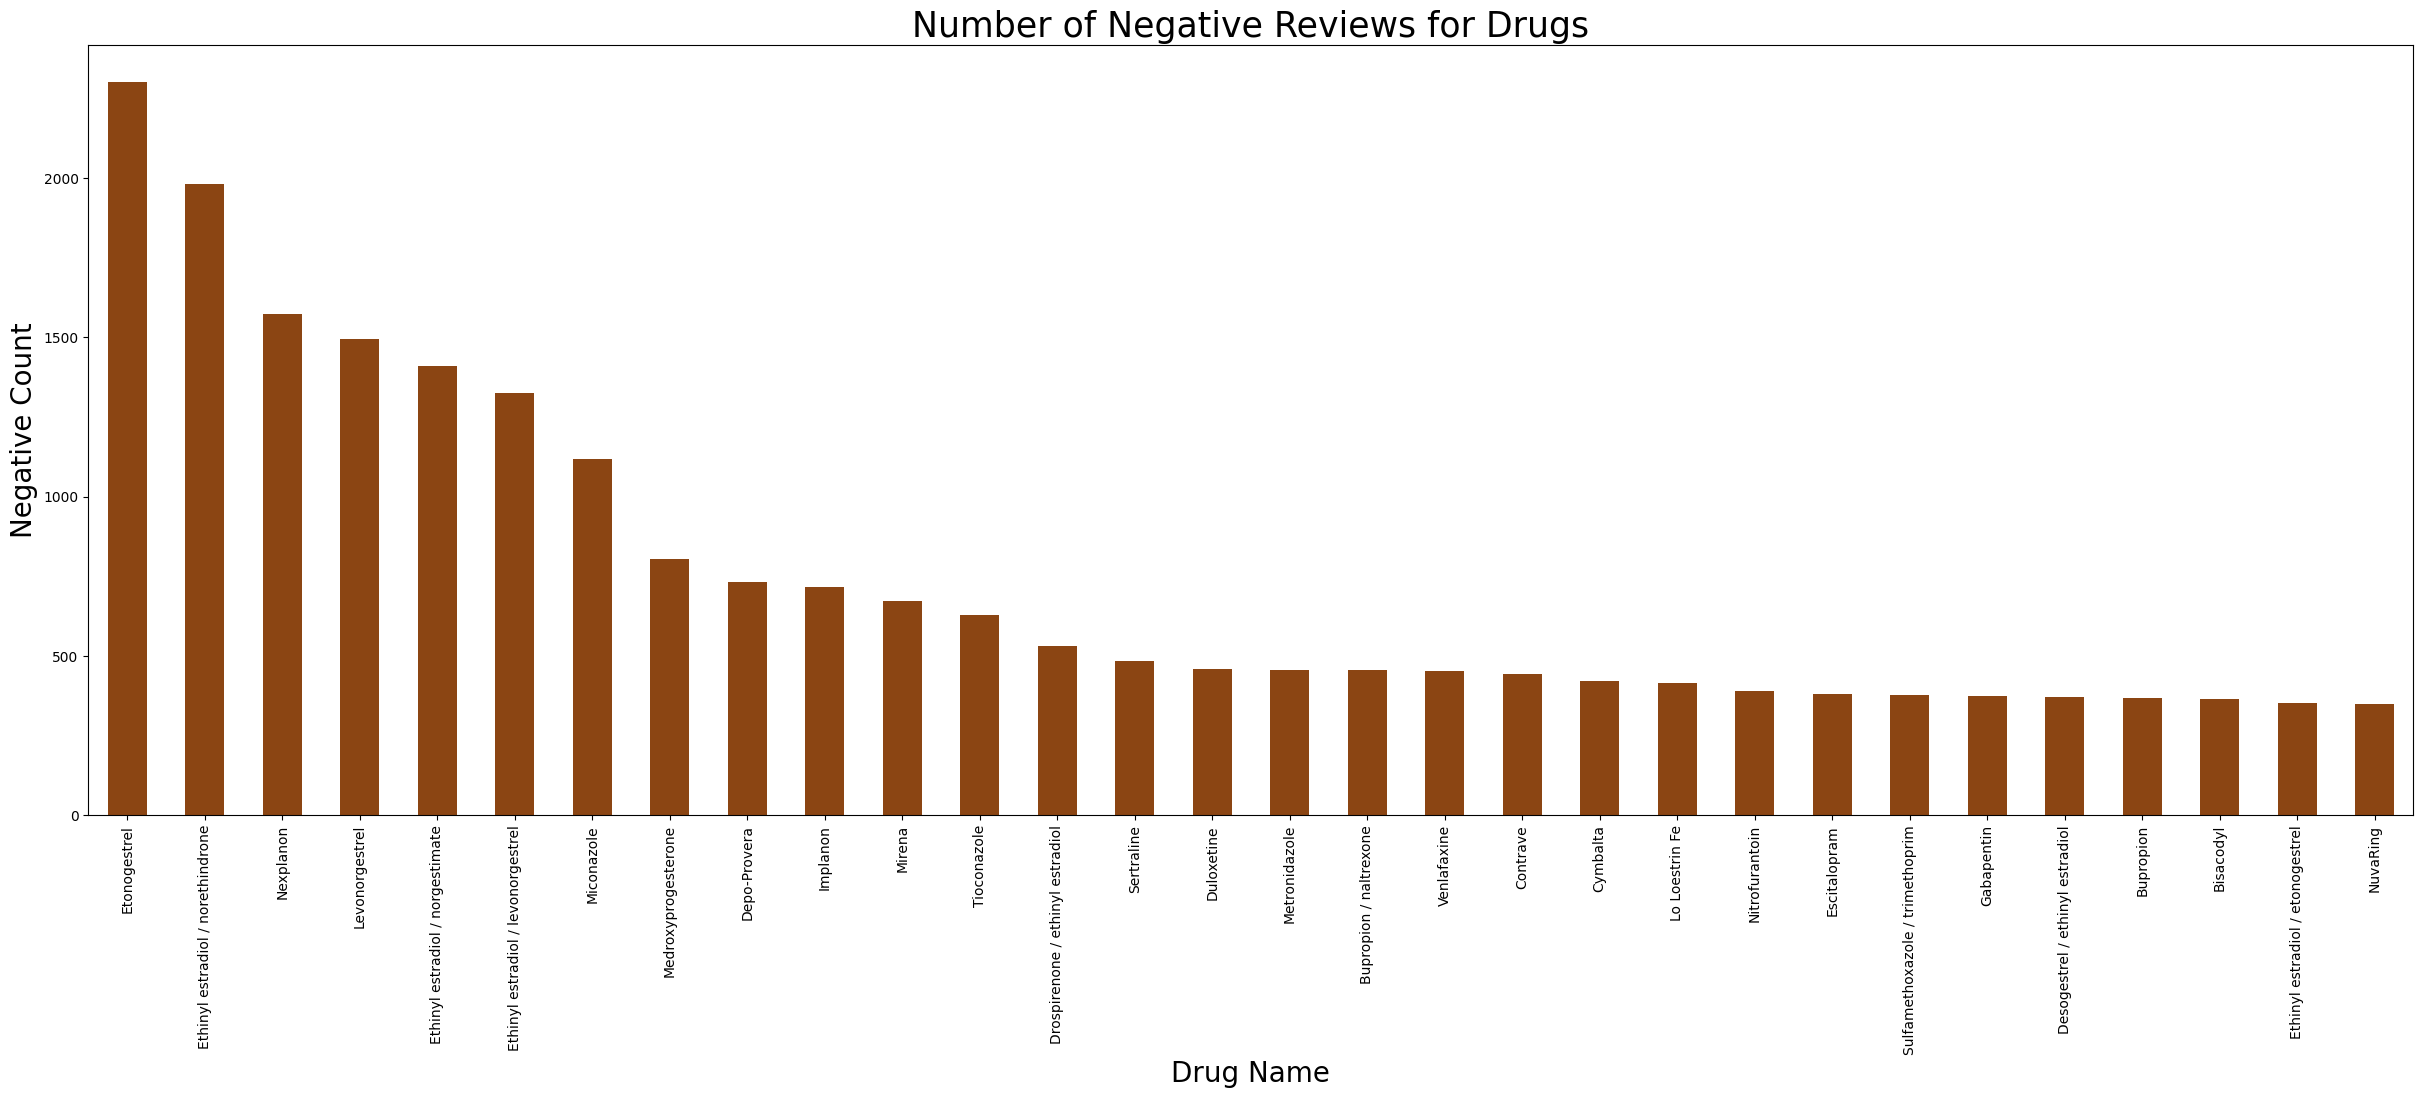

In [29]:
#Number of negative reviews for top 30 drugs

negative_count[0:30].plot(kind='bar', figsize=(30,10), fontsize=(10), color='saddlebrown')
plt.xlabel("Drug Name", fontsize=20)
plt.ylabel("Negative Count", fontsize=20)
plt.title("Number of Negative Reviews for Drugs", fontsize=25)
plt.show()

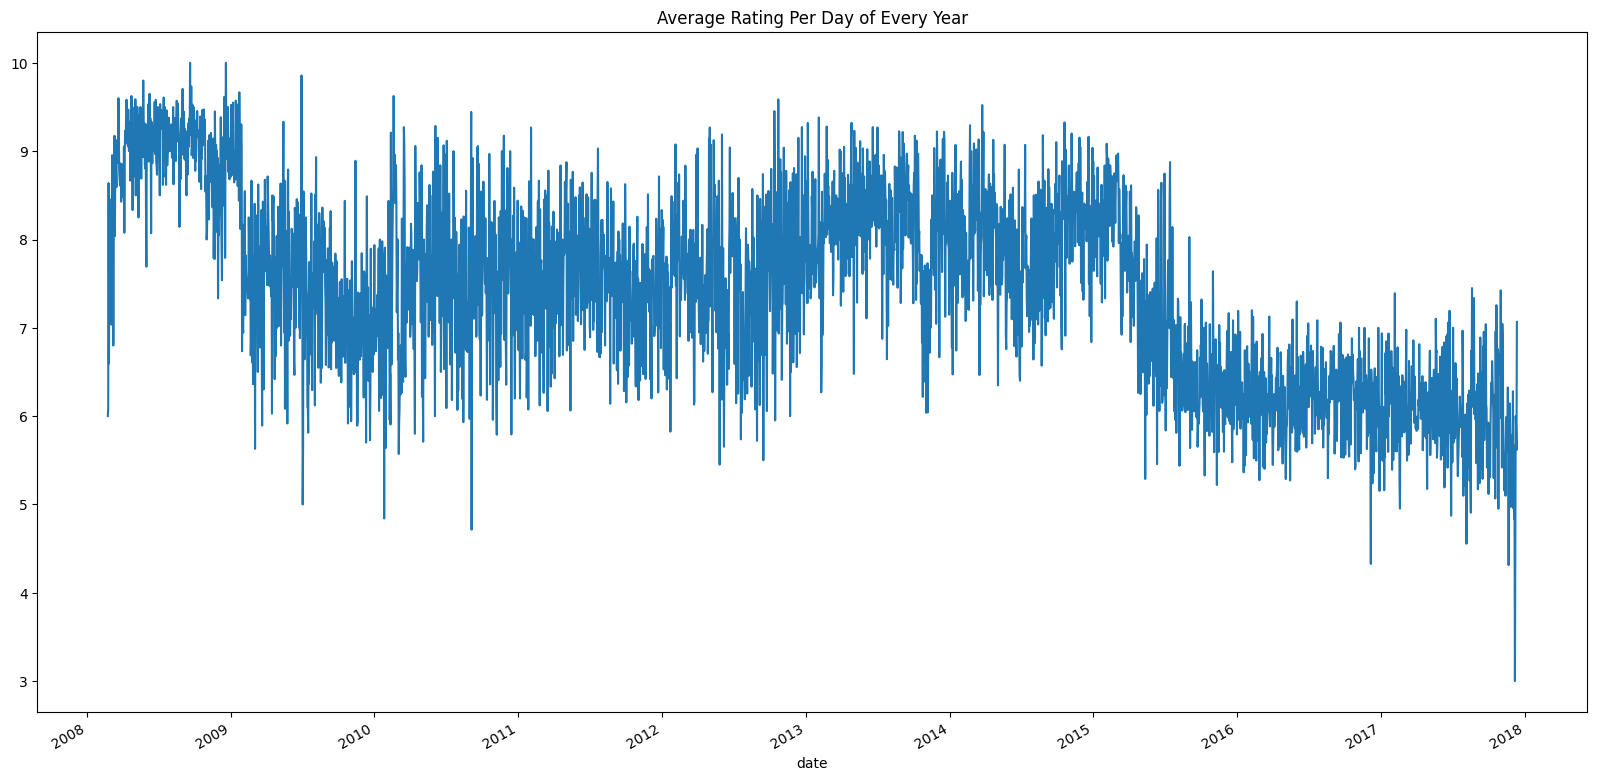

In [30]:
# Average Rating Per Day of Every Year
df.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Average Rating Per Day of Every Year")
plt.show()

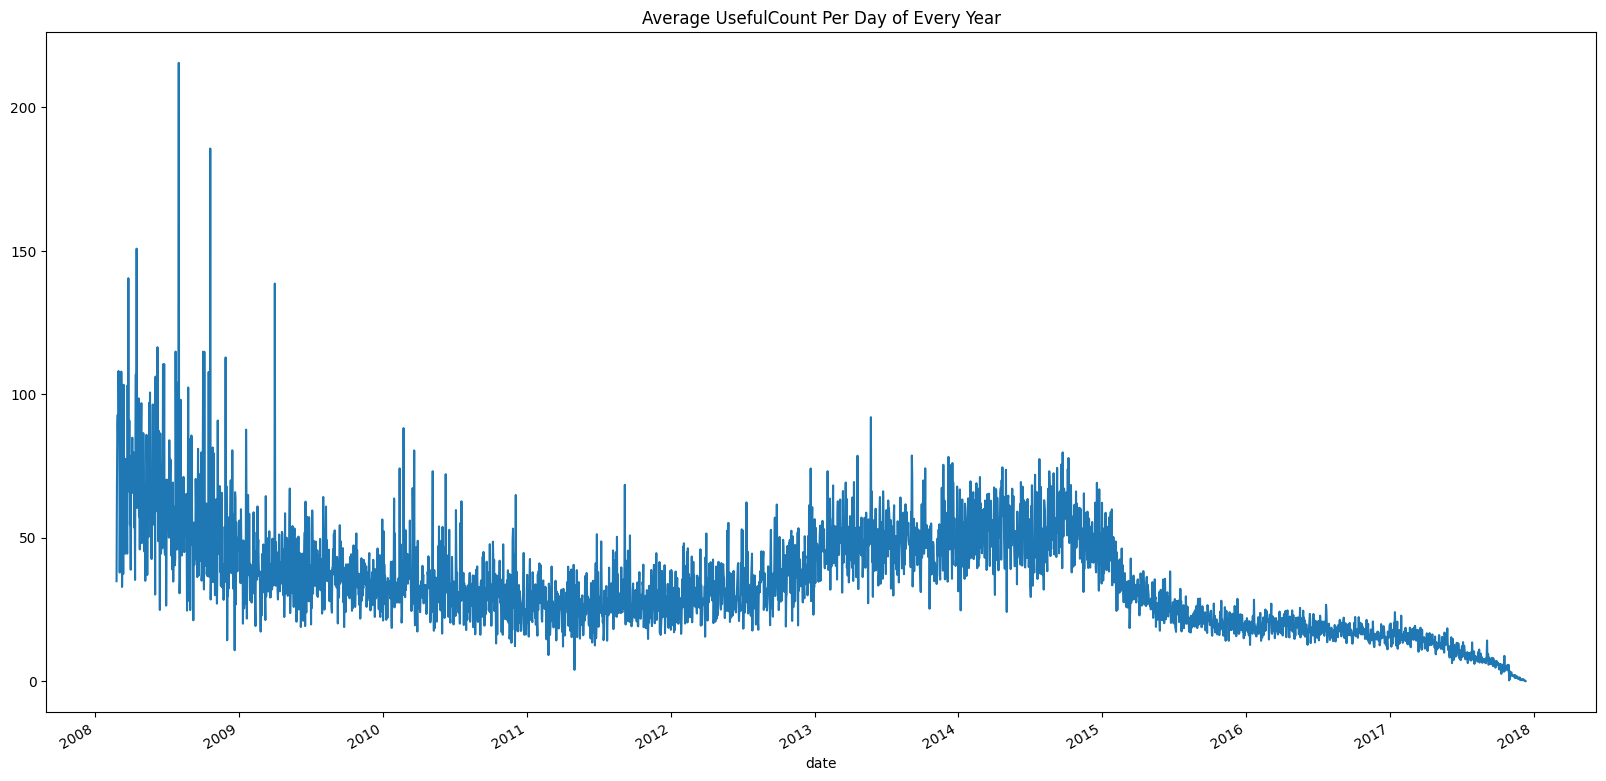

In [31]:
# Average Useful Per Day of Every Year
df.groupby('date')['usefulContent'].mean().plot(figsize=(20,10))
plt.title("Average UsefulCount Per Day of Every Year")
plt.show()

In [32]:
dfS=df[['ID','review','rating']].copy()

In [33]:
dfS.head()

,ID,review,rating
0,206461,"""It has no side effect, I take it in combinati...",9
1,95260,"""My son is halfway through his fourth week of ...",8
2,92703,"""I used to take another oral contraceptive, wh...",5
3,138000,"""This is my first time using any form of birth...",8
4,35696,"""Suboxone has completely turned my life around...",9


In [34]:
dfS.isnull().any()

ID        False
review    False
rating    False
dtype: bool

Natural Language Processing


In [35]:
import nltk 
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91735\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91735\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
dfS['cleanedReview'] = dfS['review'].apply(lambda x:' '.join([item for item in x.split() if item not in stop_words]))

In [37]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [40]:
dfS['vaderScore'] = dfS['cleanedReview'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [41]:
pos= len(dfS[dfS['vaderScore']>=0.05])
zer= len(dfS[(dfS['vaderScore'] >-0.05 ) & (dfS['vaderScore']<0.05)])
neg= len(dfS[dfS['vaderScore']<=-0.05])

In [42]:
pos

106198

In [43]:
zer

9035

In [44]:
neg

99830

In [46]:
dfS['vaderSent']=dfS['vaderScore'].map(lambda x:int(2) if x>=0.05 else int(1) if x<=-0.05 else int(0))

In [47]:
dfS['vaderSent'].value_counts()

vaderSent
2    106198
1     99830
0      9035
Name: count, dtype: int64

In [50]:
dfS.loc[dfS['vaderScore'] >=0.05,"vaderSentLabel"] ="positive"
dfS.loc[(dfS['vaderScore'] >-0.05) & (dfS['vaderScore']<0.05),"vaderSentLabel"]= "neutral"
dfS.loc[dfS['vaderScore']<=-0.05,"vaderSentLabel"] = "negative"

In [51]:
rating_pos = len(dfS[dfS['rating'] >=7.0])
rating_zer = len(dfS[(dfS['rating'] >=5) & (dfS['rating']<7)])
rating_neg = len(dfS[dfS['rating']<=4])

In [52]:
dfS['rating_Sentiment']= dfS['rating'].map(lambda x:int(2) if x>=7 else int(1) if x<=4 else int(0) )

In [53]:
dfS['rating_Sentiment'].value_counts()

rating_Sentiment
2    142306
1     53572
0     19185
Name: count, dtype: int64

In [54]:
dfS.loc[dfS['rating'] >=7.0,"ratingSentimentLabel"] ="positive"
dfS.loc[(dfS['rating'] >=5.0) & (dfS['rating']<7.0),"ratingSentimentLabel"]= "neutral"
dfS.loc[dfS['rating']<=4.0,"ratingSentimentLabel"] = "negative"

In [55]:
dfS.head()

,ID,review,rating,cleanedReview,vaderScore,vaderSent,vaderSentLabel,rating_Sentiment,ratingSentimentLabel
0,206461,"""It has no side effect, I take it in combinati...",9,"""It side effect, I take combination Bystolic 5...",0.0000,0,neutral,2,positive
1,95260,"""My son is halfway through his fourth week of ...",8,"""My son halfway fourth week Intuniv. We became...",0.9070,2,positive,2,positive
2,92703,"""I used to take another oral contraceptive, wh...",5,"""I used take another oral contraceptive, 21 pi...",0.7096,2,positive,0,neutral
3,138000,"""This is my first time using any form of birth...",8,"""This first time using form birth control. I&#...",0.7184,2,positive,2,positive
4,35696,"""Suboxone has completely turned my life around...",9,"""Suboxone completely turned life around. I fee...",0.9403,2,positive,2,positive


In [59]:
dfS = dfS[['ID','review','cleanedReview','rating','rating_Sentiment','ratingSentimentLabel','vaderScore','vaderSent','vaderSentLabel']]
df_data=dfS.drop(['review','cleanedReview'],axis=1)
df_data.head()

,ID,rating,rating_Sentiment,ratingSentimentLabel,vaderScore,vaderSent,vaderSentLabel
0,206461,9,2,positive,0.0000,0,neutral
1,95260,8,2,positive,0.9070,2,positive
2,92703,5,0,neutral,0.7096,2,positive
3,138000,8,2,positive,0.7184,2,positive
4,35696,9,2,positive,0.9403,2,positive


In [60]:
from  sklearn  import tree
from sklearn import preprocessing
from sklearn import tree

In [61]:
x0 = df_data.iloc[ : , 0 :-1]
x0

,ID,rating,rating_Sentiment,ratingSentimentLabel,vaderScore,vaderSent
0,206461,9,2,positive,0.0000,0
1,95260,8,2,positive,0.9070,2
2,92703,5,0,neutral,0.7096,2
3,138000,8,2,positive,0.7184,2
4,35696,9,2,positive,0.9403,2
...,...,...,...,...,...,...
53761,159999,10,2,positive,-0.8924,1
53762,140714,9,2,positive,0.9223,2
53763,130945,8,2,positive,-0.8471,1
53764,47656,1,1,negative,-0.8175,1


In [62]:
y0 = df_data['vaderSentLabel']
y0

0         neutral
1        positive
2        positive
3        positive
4        positive
           ...   
53761    negative
53762    positive
53763    negative
53764    negative
53765     neutral
Name: vaderSentLabel, Length: 215063, dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
l1 = preprocessing.LabelEncoder()
l1.fit(['neutral', 'positive','negative'])

LabelEncoder()

In [65]:
x = x0
x.iloc[:,3] = l1.transform(x0.iloc[:,3])
l0 = preprocessing.LabelEncoder()
l0.fit(['neutral', 'positive','negative'])
y= l0.transform(y0)

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.05\ngini = 0.539\nsamples = 215063\nvalue = [99830, 9035, 106198]'),
 Text(0.4, 0.5, 'x[4] <= -0.05\ngini = 0.152\nsamples = 108865\nvalue = [99830, 9035, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 99830\nvalue = [99830, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9035\nvalue = [0, 9035, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 106198\nvalue = [0, 0, 106198]')]

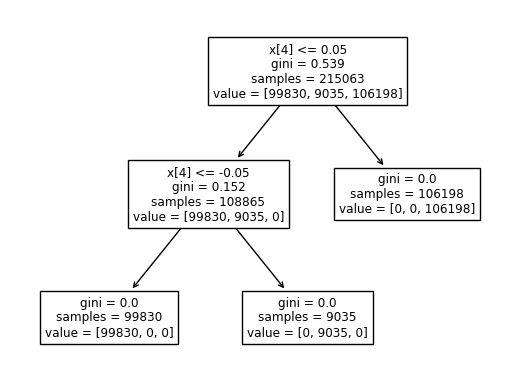

In [66]:
clf = tree.DecisionTreeClassifier()
clf_fit =clf.fit(x,y)
tree.plot_tree(clf_fit)

<Axes: xlabel='ratingSentimentLabel'>

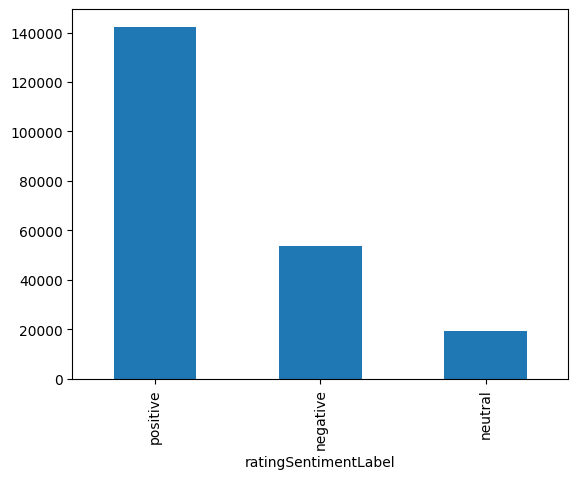

In [67]:
dfS['ratingSentimentLabel'].value_counts().plot(kind='bar')

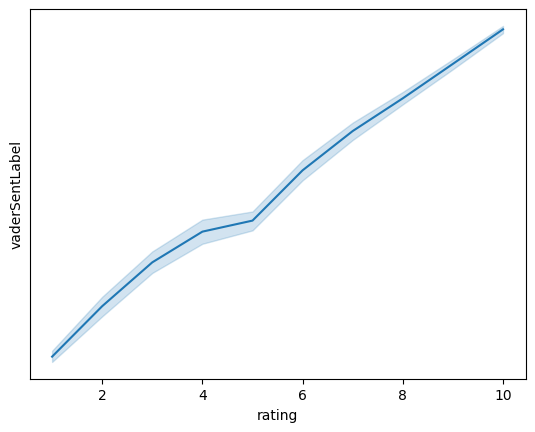

In [68]:
sns.lineplot(data=dfS,x='rating',y='vaderSentLabel')
plt.show()

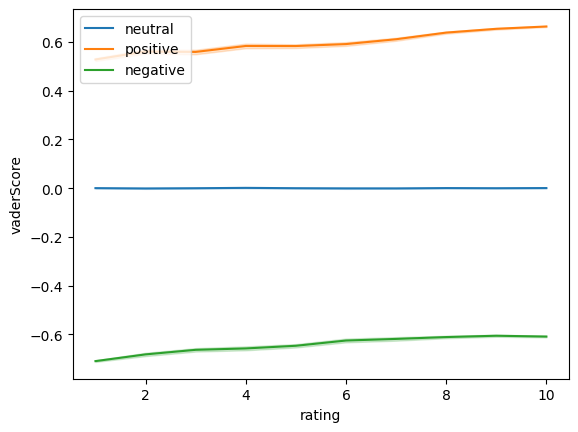

In [69]:
sns.lineplot(data=dfS,x='rating',y='vaderScore',hue='vaderSentLabel')
plt.legend(loc='upper left')

<Axes: xlabel='rating', ylabel='usefulContent'>

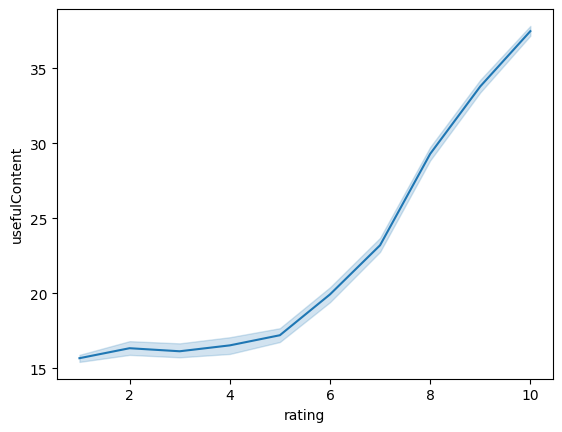

In [70]:
sns.lineplot(data=df,x='rating',y='usefulContent')